In [ ]:
# Задание
# Построить 5 графиков по выбранным данным. 
#
# Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 
#
# Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
# (например, посмотреть на корреляцию двух величин или на распределение значений) 
# и почему выбрали именно такой тип графика.

In [18]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
import plotly
from geopy import distance

In [ ]:
# Используем датасет "New York City Taxi Trip Duration"

In [6]:
data = pd.read_csv('train.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
data['straight_distance'] = data.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [14]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,straight_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.933406
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.123849
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.964154
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.921886
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.737591


In [87]:
desc = data.describe(percentiles=[0.001,0.999])
desc

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,straight_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,2.138879e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,2.672057e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
0.1%,1.000000e+00,1.000000e+00,-7.401722e+01,4.064151e+01,-7.417761e+01,4.060423e+01,7.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.301179e+00
99.9%,2.000000e+00,6.000000e+00,-7.377669e+01,4.084248e+01,-7.373976e+01,4.088955e+01,8.512836e+04,1.538623e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,7.708173e+02


In [93]:
# Первый график 
# Частота посадки в такси в зависимости от места расположения точки посадки 
#
# Используемые переменные: координаты численного типа
#
# Цель: отобразить распределение плотности использования такси , которое можно использовать для размещения такси по местности 
#       для повышения скорости обслуживания   
#
# Тип графика: выбран график типа heatmap,
#              библиотека seaborn,
#              heatmap позволяет отобразить зависимость от 3 переменных численного непрерывного типа             

In [88]:
p_max_lat, p_max_long = desc['pickup_latitude']['99.9%'],desc['pickup_longitude']['99.9%']
p_min_lat, p_min_long = desc['pickup_latitude']['0.1%'],desc['pickup_longitude']['0.1%']
d_max_lat, d_max_long = desc['dropoff_latitude']['99.9%'],desc['dropoff_longitude']['99.9%']
d_min_lat, d_min_long = desc['dropoff_latitude']['0.1%'],desc['dropoff_longitude']['0.1%']

In [103]:
d = 1000
m = np.zeros((d+1,d+1))
koef_lat = max(p_max_lat-p_min_lat, d_max_lat-d_min_lat)/d
koef_long = max(p_max_long-p_min_long, d_max_long-d_min_long)/d

In [104]:
for index, row  in data.iterrows():
    x = int((row["pickup_latitude"]-p_min_lat)/koef_lat)
    y = int((row["pickup_longitude"]-p_min_long)/koef_long)
    x = d-x if 0 <=x <= 1000 else 0 if x < 0 else 1000  
    y = y if 0 <=y <= 1000 else 0 if y < 0 else 1000  
    m[x,y]=m[x,y]+1

In [105]:
import math
n=1/1-np.exp(-m)

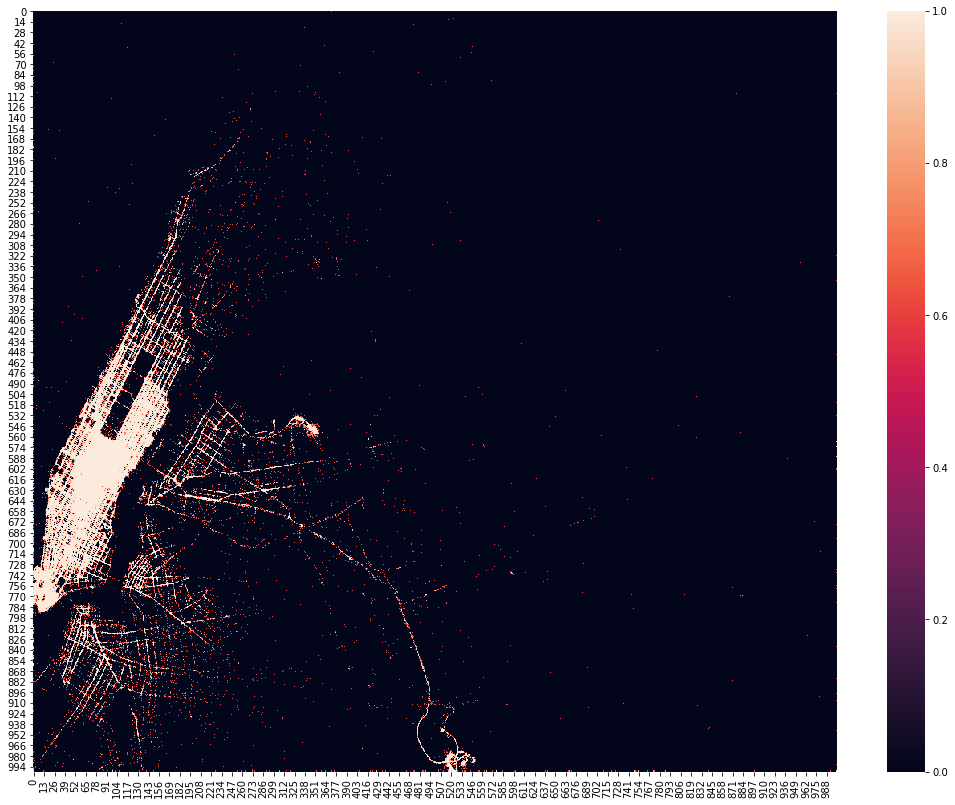

In [106]:

matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(n)

In [65]:
# Второй график 
# Изменение использования такси различных vendor'ов в течении года 
#
# Используемые переменные: vendor - категориальная переменная типа - nominal 
#                          
# Цель: отобразить распределение плотности использования такси , которое можно использовать для размещения такси по местности 
#       для повышения скорости обслуживания   
#
# Тип графика: выбран график типа Scatter,
#              библиотека plotly,
#              Scatter позволяет отобразить изменение величин в течении некоторого времени   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
import datetime
vendor = data[['vendor_id', 'pickup_datetime']]
vendor['date']= vendor.apply(lambda x: x['pickup_datetime'][:10], axis=1)
vendor.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,vendor_id,pickup_datetime,date
0,2,2016-03-14 17:24:55,2016-03-14
1,1,2016-06-12 00:43:35,2016-06-12
2,2,2016-01-19 11:35:24,2016-01-19
3,2,2016-04-06 19:32:31,2016-04-06
4,2,2016-03-26 13:30:55,2016-03-26


In [130]:
res = vendor.groupby(['vendor_id', 'date']).count().reset_index()
res.head()

,vendor_id,date,pickup_datetime
0,1,2016-01-01,3068
1,1,2016-01-02,2905
2,1,2016-01-03,2916
3,1,2016-01-04,3178
4,1,2016-01-05,3322


In [134]:
res_p = res.pivot(columns='vendor_id', index='date',values='pickup_datetime')
res_p.head()

vendor_id,1,2
date,,
2016-01-01,3068,4094
2016-01-02,2905,3607
2016-01-03,2916,3437
2016-01-04,3178,3547
2016-01-05,3322,3882


In [138]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
#res_p.plot()
trace0 = go.Scatter(
    x=res_p.index,
    y=res_p[1],
    name='Vendor 1'
)

trace1 = go.Scatter(
    x=res_p.index,
    y=res_p[2],
    name='Vendor 2'
)

data = [trace0, trace1]
layout = {'title': 'Vendor usage statistics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)